<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#作业要求" data-toc-modified-id="作业要求-1">作业要求</a></span></li><li><span><a href="#一-时间序列图" data-toc-modified-id="一-时间序列图-2">一 时间序列图</a></span><ul class="toc-item"><li><span><a href="#1-分别绘制每个国家的4个指标" data-toc-modified-id="1-分别绘制每个国家的4个指标-2.1">1 分别绘制每个国家的4个指标</a></span></li><li><span><a href="#2-在4个指标上绘制两个国家" data-toc-modified-id="2-在4个指标上绘制两个国家-2.2">2 在4个指标上绘制两个国家</a></span></li><li><span><a href="#3-在每个国家上绘制4个指标" data-toc-modified-id="3-在每个国家上绘制4个指标-2.3">3 在每个国家上绘制4个指标</a></span></li></ul></li><li><span><a href="#二-模型预测" data-toc-modified-id="二-模型预测-3">二 模型预测</a></span><ul class="toc-item"><li><span><a href="#1-美国的4个个模型" data-toc-modified-id="1-美国的4个个模型-3.1">1 美国的4个个模型</a></span></li><li><span><a href="#2-英国的4个个模型" data-toc-modified-id="2-英国的4个个模型-3.2">2 英国的4个个模型</a></span></li></ul></li></ul></div>

#### 作业要求
选定2个自己感兴趣的国家，按照每天时间间隔统计这个国家COVID-19的疫情数据，具体包括以下指标：1.累计确诊人数；2.累计死亡人数；3.累计治愈人数；4.每天新增确诊人数。  
首先画出这四个指标的时间序列图；比较2个国家各个指标的时间序列图；对于每个指标拟合出一个模型来预测未来的发展趋势。

在本次作业中：  

  1. 首先整理了美国（USA）和英国（UK）3月1日-3月29日的数据  
  2. 因为同一国家的不同指标量级差别较大、同一指标在不同国家量级差别也较大，所以我们从3个角度绘制折线图  
  - 如果不从量级上比较，只看形状，会发现相比英国，美国各个指标形状的上升趋势更明显，波动却较小
  - 英国后期累积死亡人数比累积治愈人数明显多，而美国后期的累积治愈人数明显上升
  - 随着时间增长，美国各项指标的总数比英国高得多
  3. 将3月1日-3月22日的数据作为训练数据，训练出模型后预测3月23日-3月29日的数据，并与真实数据进行比较

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit #导入拟合模块

In [2]:
# 读入文件
USA = pd.read_csv("USA.csv",parse_dates=['date'],header=0,index_col=0)
UK = pd.read_csv("UK.csv",parse_dates=['date'],header=0,index_col=0)

In [3]:
# 查看USA
USA

,confirmed,deaths,recovered,new_confirmed
date,,,,
2020-03-01,74,1,7,6
2020-03-02,98,6,7,24
2020-03-03,118,7,7,20
2020-03-04,149,11,7,31
2020-03-05,217,12,7,68
2020-03-06,262,14,7,45
2020-03-07,402,17,7,140
2020-03-08,518,21,7,116
2020-03-09,583,22,7,65


In [4]:
# 查看UK
UK

,confirmed,deaths,recovered,new_confirmed
date,,,,
2020-03-01,36,0,8,13
2020-03-02,40,0,8,4
2020-03-03,51,0,8,11
2020-03-04,86,0,8,35
2020-03-05,116,1,8,30
2020-03-06,164,2,8,48
2020-03-07,207,2,18,43
2020-03-08,274,3,18,67
2020-03-09,322,4,18,48


#### 一 时间序列图
##### 1 分别绘制每个国家的4个指标
如果不从量级上比较，只看形状，会发现相比英国，美国各个指标形状的上升趋势更明显，波动却较小

In [5]:
def plot_country(df):
    j=0
    fig = plt.figure(figsize=(10, 8))
    for F in df.columns:
        j+=1
        ax = fig.add_subplot(2,2,j)
        ax.set_title(f'{F}')
        ax = df[F].plot()      
        ax.grid(axis='y')
    plt.subplots_adjust(wspace =0.25, hspace =0.6)
    plt.show()

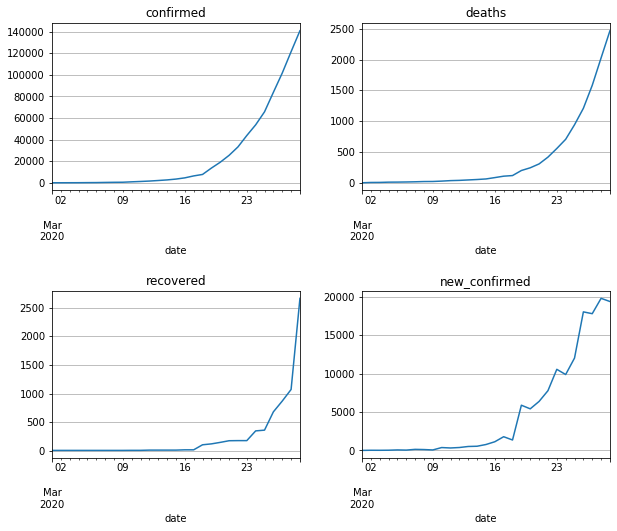

In [6]:
# 绘制美国在4个指标上的折线图
plot_country(USA)

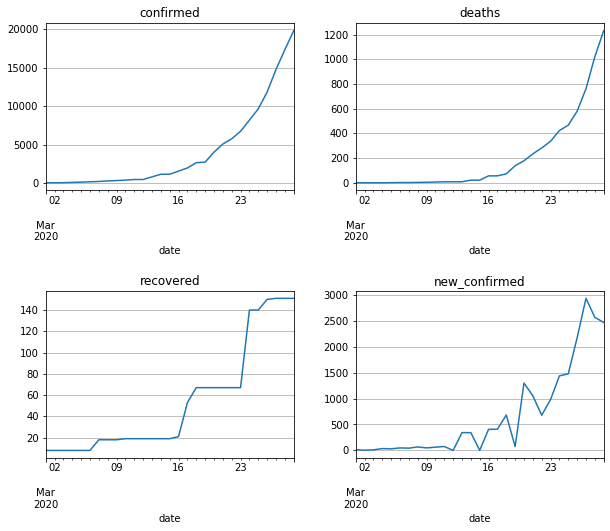

In [7]:
# 绘制英国在4个指标上的折线图
plot_country(UK)

##### 2 在4个指标上绘制两个国家
随着时间增长，美国各项指标的总数比英国高得多

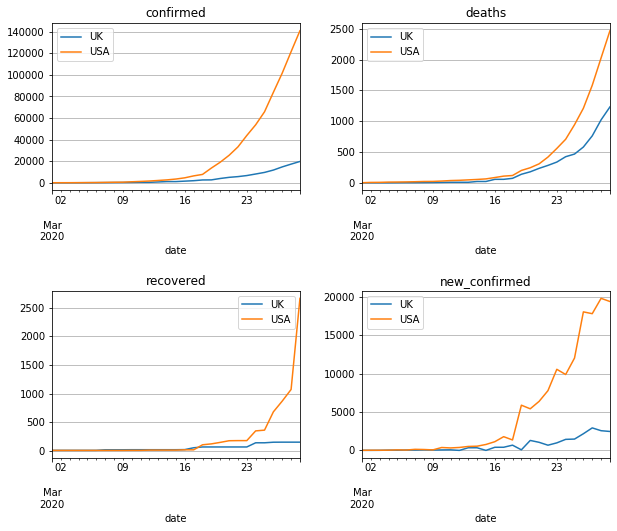

In [8]:
# 将两个国家的指标图画在一起
j=0
fig = plt.figure(figsize=(10, 8))
for F in USA.columns:
    j+=1
    ax = fig.add_subplot(2,2,j)
    ax.set_title(f'{F}')
    ax = UK[F].plot(label='UK')
    ax = USA[F].plot(label='USA') 
    ax.legend(loc="best")
    ax.grid(axis='y')
plt.subplots_adjust(wspace =0.25, hspace =0.6)
plt.show()

##### 3 在每个国家上绘制4个指标
英国后期累积死亡人数比累积治愈人数明显多，而美国后期的累积治愈人数明显上升

In [9]:
def plot_cntry(df,name):
    df['confirmed'].plot(label='confirmed')
    df['deaths'].plot(label='deaths')
    df['recovered'].plot(label='recovered')
    df['new_confirmed'].plot(label='new confirmed')
    plt.ylabel('count')
    plt.title(name)
    plt.legend()
    plt.grid(axis='y')

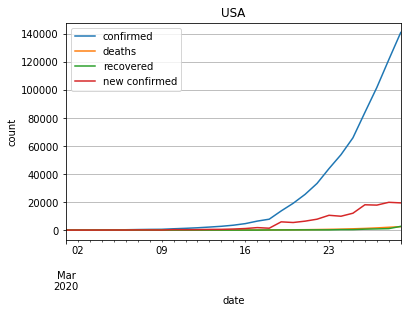

In [10]:
# 在一张图上绘制美国4个指标
plot_cntry(USA,'USA')

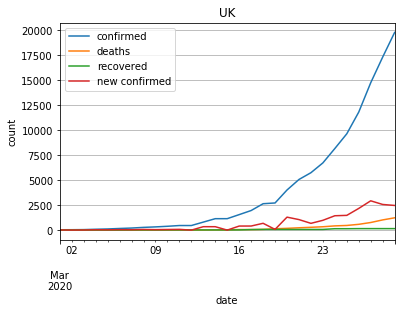

In [11]:
# 在一张图上绘制英国4个指标
plot_cntry(UK,'UK')

#### 二 模型预测
##### 1 美国的4个个模型
采用logistic函数，因为从散点图可以看到这些散点大致分布在“S”形曲线的前半部分，logistic函数表达式如下
$f(t)=\frac{K P_{0} e^{r t}}{K+P_{0}\left(e^{r t}-1\right)}$。  
其中：
- K为环境容量，即增长到最后，f(t)能达到的极限
- P0为初始容量，就是t=0时刻的数量。
- r为增长速率，r越大则增长越快，越快逼近K值，r越小增长越慢，越慢逼近K值。

In [12]:
# 定义logistic函数
def logistic(t,K,P0,r):
    exp_value=np.exp(r*(t))
    return (K*exp_value*P0)/(K+(exp_value-1)*P0)

# 预测国家在一个指标上的变化
def fit_model(data,feature):
    date=data['date'] #日期
    confirm=data[feature]
    confirm_train = confirm.head(22)
    confirm_test = confirm.tail(7)
    t=range(len(confirm))
    t_train=confirm_train.index
    t_test=confirm_test.index

    # fig=plt.figure()
    # ax=fig.add_subplot(1, 1, 1) 
    ax.set_ylabel(f"{feature} count")
    ax.set_xlabel("date")
    ax.set_xticklabels(['', '3-1', '3-6','3-11','3-16','3-21','3-26'], fontsize=10) #横坐标
    ax.scatter(t,confirm, c="orange", s=15,label="true count")
    ax.plot(t_train,confirm_train,'--',c="b",label="train data")

    coef, pcov = curve_fit(logistic, t_train, confirm_train,p0=[1,confirm[0],1], maxfev=5000)
    ax.set_title(f'{feature}: K=%5.2f, P0=%5.2f, r=%5.2f' % tuple(coef))
    K,P0,r = coef[0], coef[1], coef[2]
    y_values = logistic(t,K,P0,r)
    ax.scatter(t,y_values,marker='+',c="g",label="predicted count",alpha=0.6)
    ax.legend()
    plt.grid(axis='y')
    # plt.show()
    # plt.close()

In [13]:
UK = pd.read_csv("UK.csv",parse_dates=['date'],header=0)
USA = pd.read_csv("USA.csv",parse_dates=['date'],header=0)

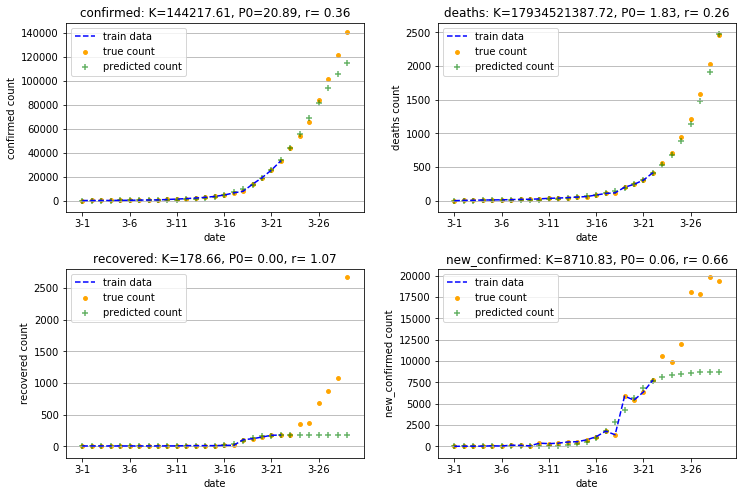

In [14]:
# 在美国的每个指标上都求出一个模型，模型参数都在标题中标注出来了
# 黄点是真实数据点，绿点是预测的数据，蓝色虚线连到的黄点是训练数据
j=0
fig = plt.figure(figsize=(12, 8))
for F in USA.drop(['date'],axis=1).columns:
    j+=1
    ax = fig.add_subplot(2,2,j)
    fit_model(USA,F)
plt.subplots_adjust(wspace =0.25, hspace =0.3)
plt.show()

##### 2 英国的4个个模型

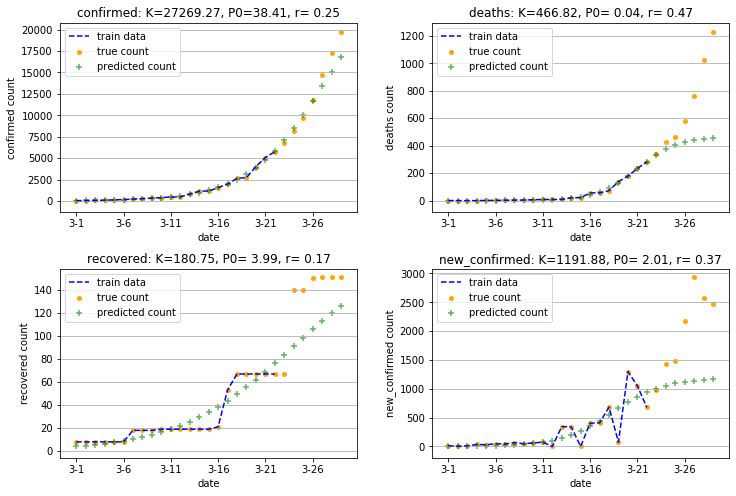

In [15]:
# 在英国的每个指标上都求出一个模型，模型参数都在标题中标注出来了
# 黄点是真实数据点，绿点是预测的数据，蓝色虚线连到的黄点是训练数据
j=0
fig = plt.figure(figsize=(12, 8))
for F in UK.drop(['date'],axis=1).columns:
    j+=1
    ax = fig.add_subplot(2,2,j)
    fit_model(UK,F)
plt.subplots_adjust(wspace =0.25, hspace =0.3)
plt.show()